# Machine Learning
# TP4 Introduction to Deep Neural Networks

We will gain a first experience in Neural Networks through the `Keras` module. We will apply its methods to the MNIST dataset. 

Importing the Machine Learning modules:

In [5]:
import keras, sklearn
# suppress tensorflow compilation warnings
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Importing numpy and matplotlib:

In [6]:
import numpy as np
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)
import matplotlib.pyplot as plt

### Step 1: Load and pre-process the data

Here the data is shuffled and split between a training and a test set. The input data (X) is reshaped as a 1-dimensional array (column vector). The pixel values are converted to `float32` type and cast from [0;255] to [0;1]. The categorical data (namely the labels Y) is turned into an array of one-hot vectors.

11493376/11490434 [==============================] - 8s 1us/step
an example of a data point with label 4


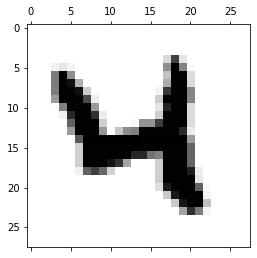

X_train shape: (60000, 784)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [7]:
from keras.datasets import mnist

# input image dimensions
num_classes = 10 # 10 digits

img_rows, img_cols = 28, 28 # number of pixels 

# the data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, depending on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
    
# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

### Step 2: Define the Neural Net and its Architecture

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


### Step 3: Choose the Optimizer and the Cost Function

In [9]:
def compile_model(optimizer=keras.optimizers.Adam()):
    # create the mode
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


### Step 4: Train the model

In [10]:
# training parameters
batch_size = 64
epochs = 10

# create the deep neural net
model_DNN=compile_model()

# train DNN and store training info in history
history=model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
938/938 [==============================] - 26s 27ms/step - loss: 0.3071 - accuracy: 0.9092 - val_loss: 0.1194 - val_accuracy: 0.9638
Epoch 2/10
938/938 [==============================] - 25s 27ms/step - loss: 0.1282 - accuracy: 0.9631 - val_loss: 0.0918 - val_accuracy: 0.9712
Epoch 3/10
938/938 [==============================] - 25s 26ms/step - loss: 0.0909 - accuracy: 0.9735 - val_loss: 0.0819 - val_accuracy: 0.9741
Epoch 4/10
938/938 [==============================] - 26s 28ms/step - loss: 0.0712 - accuracy: 0.9787 - val_loss: 0.0736 - val_accuracy: 0.9778
Epoch 5/10
938/938 [==============================] - 29s 30ms/step - loss: 0.0564 - accuracy: 0.9828 - val_loss: 0.0729 - val_accuracy: 0.9796
Epoch 6/10
938/938 [==============================] - 28s 29ms/step - loss: 0.0467 - accuracy: 0.9855 - val_loss: 0.0732 - val_accuracy: 0.9791
Epoch 7/10
938/938 [==============================] - 27s 29ms/step - loss: 0.0376 - accuracy: 0.9885 - val_loss: 0.0772 - val_accuracy:

### Step 5: Evaluate the model performance on the test set

313/313 [==============================] - 3s 10ms/step - loss: 0.0813 - accuracy: 0.9798

Test loss: 0.08128918707370758
Test accuracy: 0.9797999858856201


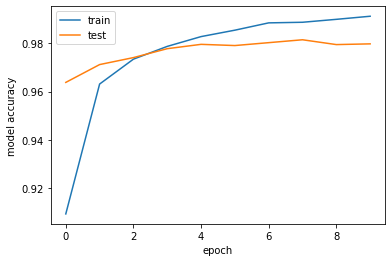

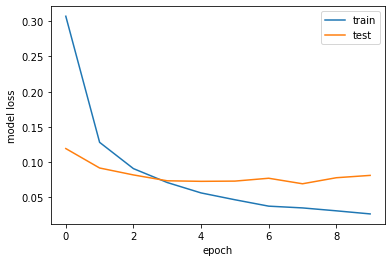

In [11]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()